# Data Analysis Notebook

Welcome to our data analysis notebook! In this notebook, we are on a journey to uncover insights from the historic SNCF train delay dataset. Our mission is to understand the dataset thoroughly, identify the useful dimensions for prediction tasks, and develop effective strategies for predicting average arrival delays and the causes behind these delays.

## Goals
- **Understand the Dataset:** Explore the dataset's structure and characteristics.
- **Identify Useful Dimensions:** Define which dimensions are valuable for prediction tasks.
- **Define possible prediction approaches:** Define viable approaches for predicting arrival delays and the causes.

## Context 
This dataset provides historical information about SNCF train delays. The data includes numeric features such as `nb_train_prevu`, `nb_annulation`, `retard_moyen_depart`, and `nb_train_retard_arrivee`. The information is aggregated monthly from 2018 to 2023 and categorized by itineraries (e.g., PARIS - LYON).

## Steps to Achieve Our Goals
1. **Data Exploration:**
   - Examine the dataset's structure.
   - Identify key features and target variables.
<br/>
<br/>

2. **Exploratory Data Analysis (EDA):**
   - Visualize data distributions.
   - Explore correlations between variables.
<br/>
<br/>

3. **Deep Dive Exploration:**
   - Investigate possible seasonality in delay metrics.
   - Identify general trends in delay metrics (increasing or decreasing averages).
   - Study the impact of Covid on the data.
   - Analyze relations between itineraries with the same departure station.
   - Explore potential relationships between various dimensions.
<br/>
<br/>

4. **Feature Selection:**
   - Identify relevant features for prediction.
<br/>
<br/>

5. **Define Possible Approaches:**
   - List potential approaches to succeed in the prediction task based on our analysis.
<br/>
<br/>

Let's embark on this exciting analytical journey and uncover valuable insights from the data!


In [1]:
# Import usefull libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
# Path to the data
path = "/Users/danielrodriguez/Desktop/"

In [3]:
# Import data
data_tgv = pd.read_csv(path + "projet-ML-CS/data/tgv_data.csv",sep=";")

## 1. Data Exploration

In [4]:
display(data_tgv.columns)

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'commentaire_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'commentaire_retards_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'commentaires_retard_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
display(data_tgv.head())

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,commentaires_retard_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,28.436735,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,21.524020,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,55.692308,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,48.623077,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,12.405164,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


As we can see the data is grouped by moth (date) and itinerary (tupple of gare_depart and gare_arrivee).

Our target columns are : 
 - `retard_moyen_arrivee`
 - `prct_cause_infra`
 - `prct_cause_gestion_trafic`
 - `prct_cause_materiel_roulant`
 - `prct_cause_gestion_gare`
 - `prct_cause_prise_en_charge_voyageurs`

## Preprocessing


In [6]:
useful_columns = ['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs']
data = data_tgv[useful_columns].copy()

In [7]:
data = data[~(data["retard_moyen_arrivee"]<=0)].copy()

In [8]:
counting_dates = data.groupby(["gare_depart","gare_arrivee"]).count()[["date"]]
trip_to_delete = counting_dates[counting_dates["date"]<66].copy().reset_index()
display(trip_to_delete)

,gare_depart,gare_arrivee,date
0,ANNECY,PARIS LYON,63
1,BARCELONA,PARIS LYON,53
2,BELLEGARDE (AIN),PARIS LYON,65
3,BORDEAUX ST JEAN,PARIS VAUGIRARD,12
4,BORDEAUX ST JEAN,TOURCOING,55
...,...,...,...
68,TOULON,PARIS LYON,65
69,TOURCOING,BORDEAUX ST JEAN,53
70,TOURCOING,MARSEILLE ST CHARLES,9
71,TOURS,PARIS MONTPARNASSE,65


In [9]:
list_trip_to_delete = trip_to_delete["gare_depart"]+trip_to_delete["gare_arrivee"].tolist()
data = data[~(data["gare_depart"]+data["gare_arrivee"]).isin(list_trip_to_delete)]

In [11]:
data.shape

(3762, 23)

## 2. Exploratory Data Analysis

In [19]:
def plot_distribution(dimension:str,Y:pd.Series):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.hist(Y, bins=50, color='gray', alpha=0.5)
    ax.set_title(f'Distribution of {dimension}')
    ax.set_xlabel(dimension)
    ax.set_ylabel('Frequency')
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.boxplot(Y)
    ax.set_title(f'Box plot of {dimension}')
    ax.set_xlabel(dimension)
    ax.set_ylabel('Value')
    plt.show()

    display(Y.describe())

Let's plot the distribution of our target variable `retard_moyen_arrivee`

To be able to compare this variable accros different itineraries we have to normalized by dividing by `duree_moyenne`

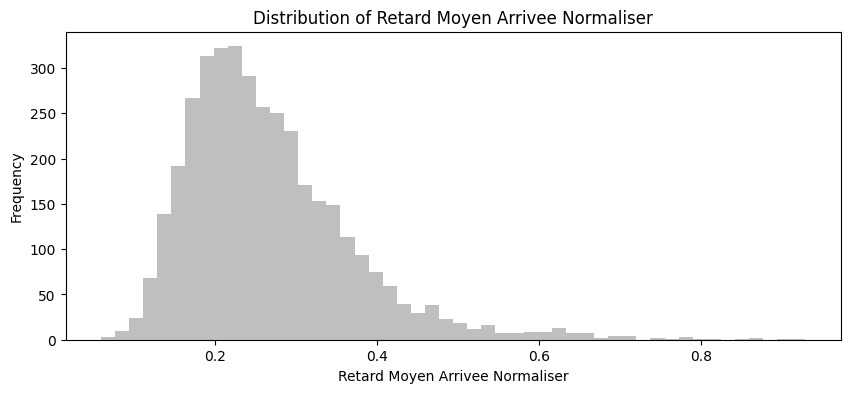

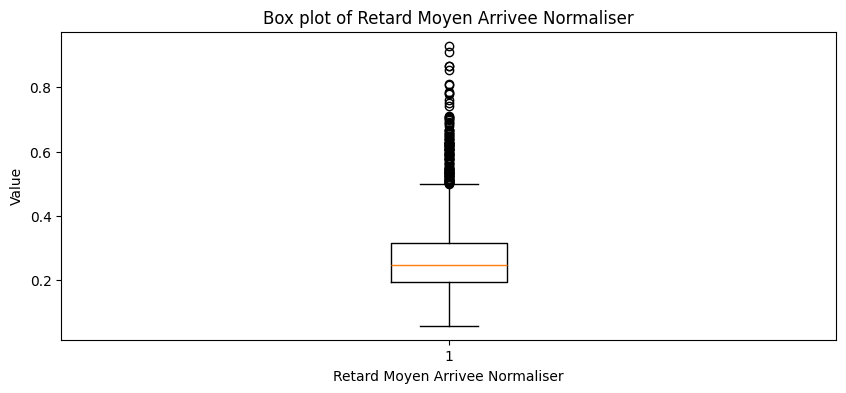

count    3762.000000
mean        0.266295
std         0.103954
min         0.059176
25%         0.193988
50%         0.246945
75%         0.315962
max         0.928623
dtype: float64

In [21]:
plot_distribution('Retard Moyen Arrivee Normaliser',data['retard_moyen_arrivee'] / data['duree_moyenne'])

**Observations:**

We have a khi 2 distribution with a standard deviation of 0.1 and a mean of 0.23. The data is well distributed but we can see we have many "outliers" (using 1.5*Q3). This is coherent, in train delays there are always exceptional events.


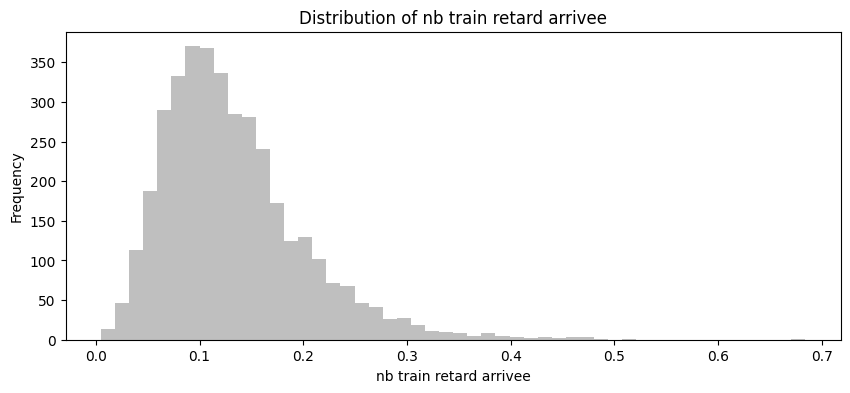

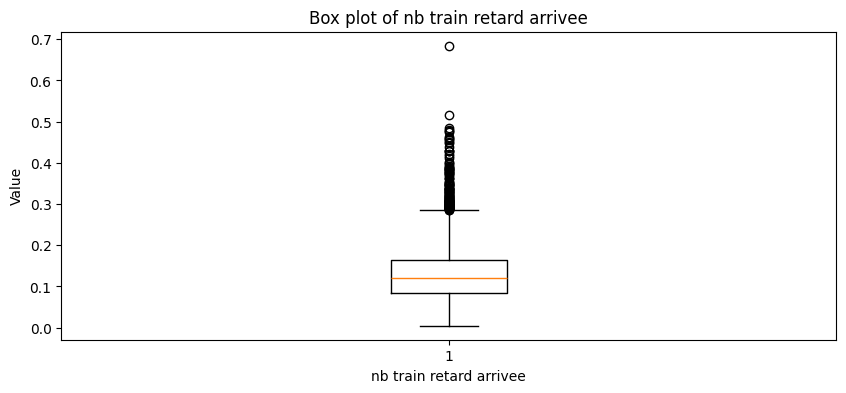

count    3762.000000
mean        0.132611
std         0.068901
min         0.004808
25%         0.084732
50%         0.120000
75%         0.165228
max         0.684211
dtype: float64

In [22]:
plot_distribution("nb train retard arrivee",data['nb_train_retard_arrivee'] / data['nb_train_prevu'])

**Observations :**

We see the same kind of distribution for the `retard_moyen_arrivee`. 

One question we asked ourselves was, when a train is delayed at the departure and by consequeces, it arrives late at the destination, does we count it on the delayed trains at arrival ?
In order to answer this question quickly we can simply study `retard_moyen_arrivee` / `retard_moyen_depart` and see if this values are always superior to 1.

In [32]:
(data['retard_moyen_arrivee'] / data['retard_moyen_depart']).describe()

count    3762.000000
mean        4.252821
std         3.820770
min         0.106219
25%         2.205634
50%         3.134854
75%         4.912088
max        61.974878
dtype: float64

**Observations :**

As we can see on the statistics, this value is almost always above one, so probably a the set trains delayed at the desparture is in the set of trains late at the arrival.

In [24]:
counting_dates = data.groupby(["gare_depart","gare_arrivee"]).count()[["date"]].reset_index()
display(counting_dates.head())
display(len(counting_dates))

,gare_depart,gare_arrivee,date
0,AIX EN PROVENCE TGV,PARIS LYON,66
1,ANGERS SAINT LAUD,PARIS MONTPARNASSE,66
2,ANGOULEME,PARIS MONTPARNASSE,66
3,ARRAS,PARIS NORD,66
4,AVIGNON TGV,PARIS LYON,66


57

We have a total of 116 itineraries and 66 dates per itinerary. 

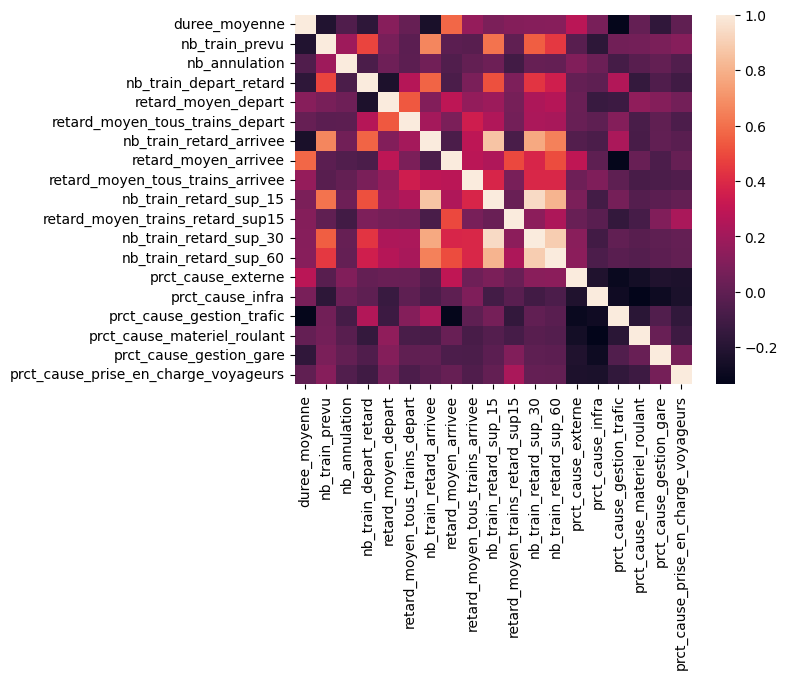

In [25]:
numeric_columns = ['duree_moyenne','nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard', 'retard_moyen_depart','retard_moyen_tous_trains_depart', 'nb_train_retard_arrivee', 'retard_moyen_arrivee','retard_moyen_tous_trains_arrivee', 'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15','nb_train_retard_sup_30', 'nb_train_retard_sup_60','prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic','prct_cause_materiel_roulant', 'prct_cause_gestion_gare','prct_cause_prise_en_charge_voyageurs']

# Compute correlation matrix of the data 
corr_mat = data[numeric_columns].corr()
sn.heatmap(corr_mat, annot=False,)
plt.show()

In [48]:
# Change the value of dim to see the correlations to the target dimensions:
#     "retard_moyen_arrivee",
#     "prct_cause_externe",
#     "prct_cause_infra",
#     "prct_cause_gestion_trafic",
#     "prct_cause_materiel_roulant",
#     "prct_cause_gestion_gare",
#     "prct_cause_prise_en_charge_voyageurs",

dim = "prct_cause_externe"
print(f" ############## {dim} ############## ")
display(corr_mat[dim].sort_values(key=lambda x:-abs(x)))

 ############## prct_cause_externe ############## 


prct_cause_externe                      1.000000
prct_cause_gestion_trafic              -0.297704
retard_moyen_arrivee                    0.295203
duree_moyenne                           0.276608
prct_cause_materiel_roulant            -0.263465
prct_cause_prise_en_charge_voyageurs   -0.232078
prct_cause_gestion_gare                -0.223234
prct_cause_infra                       -0.220085
nb_train_retard_sup_60                  0.130148
nb_train_retard_sup_30                  0.127571
nb_annulation                           0.099261
nb_train_retard_sup_15                  0.084065
nb_train_retard_arrivee                -0.045101
retard_moyen_tous_trains_arrivee        0.042395
nb_train_prevu                         -0.027705
retard_moyen_depart                     0.025679
retard_moyen_trains_retard_sup15        0.024206
retard_moyen_tous_trains_depart         0.020934
nb_train_depart_retard                  0.014920
Name: prct_cause_externe, dtype: float64

**Observations :**

The previous analysis show that the most related variables to `retard_moyen_arrivee` are:
- `duree_moyenne`
- `nb_train_retard_sup_60`
- `retard_moyen_trains_retard_sup15`
- `nb_train_retard_sup_30`
- `prct_cause_gestion_trafic`
- `prct_cause_externe`

Based on this results, the dimensions we should consider for the prediction of `retard_moyen_arrivee` are the history of all the `prct_cause` dimensions (except one because we have the last one can be computed from the others ) ,`retard_moyen_arrivee`, `duree_moyenne` , `nb_train_retard_sup_60`,`retard_moyen_trains_retard_sup15` and `nb_train_retard_sup_30`. All of this dimensions are coherent, they are clearly related to the `retard_moyen_arrivee`.

Then for each one of the `prct_cause` we have to predict, we always found the other 5 `prct_cause` on the top correlated dimensions. This was expected, but then for each one of them we will have other specific metrics strogly correlated. 

For `prct_cause_externe`, we have :
- `retard_moyen_arrivee`
- `duree_moyenne`
This is normal because `une cause externe` will increase the `retard_moyen_arrivee` so the `duree_moyenne` too

For `prct_cause_infra`, we have:
- `nb_train_prevu`
This is coherent, if the are issue with the infrastructure they will plan less trains 

For `prct_cause_gestion_trafic`, we have all the delay metrics impacted, as well as the average duration:
- `duree_moyenne`
- `retard_moyen_arrivee`
- `nb_train_depart_retard`
- `nb_train_retard_arrivee`

For `prct_cause_materiel_roulant` it seems that only the departure delays is correlated:
- `nb_train_depart_retard`
- `retard_moyen_depart`   

For `prct_cause_prise_en_charge_voyageurs`, the most correlated dimension is `retard_moyen_trains_retard_sup15`, this is expected given the fact an passenger that need to be taken care of ussually implies a delay of more than 15 minutes.

Finally `prct_cause_gestion_gare` has a very different top correlated dimensions.


## 3. Data Deep Dive

Let's look at some specific itineraries to see the evolution of the `retard_moyen_arrivee` accross time.

In [58]:
def plot_metric_against_data(df:pd.DataFrame):
    plt.figure(figsize=(15, 6))
    plotted_dims = []
    for dim in df.columns:
        if dim != "date":
            plt.plot(df['date'], df[dim], marker='.', linestyle='-', label=dim)
            plotted_dims.append(dim)
    plt.title(f'{plotted_dims} vs Date')
    plt.xlabel('Date')
    plt.ylabel(f'{plotted_dims}') 
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

In [53]:
data["date"]=pd.to_datetime(data["date"])
itineray = ('PARIS MONTPARNASSE','TOULOUSE MATABIAU')
filtered_data = data[(data["gare_depart"]==itineray[0])*(data["gare_arrivee"]==itineray[1])].copy()


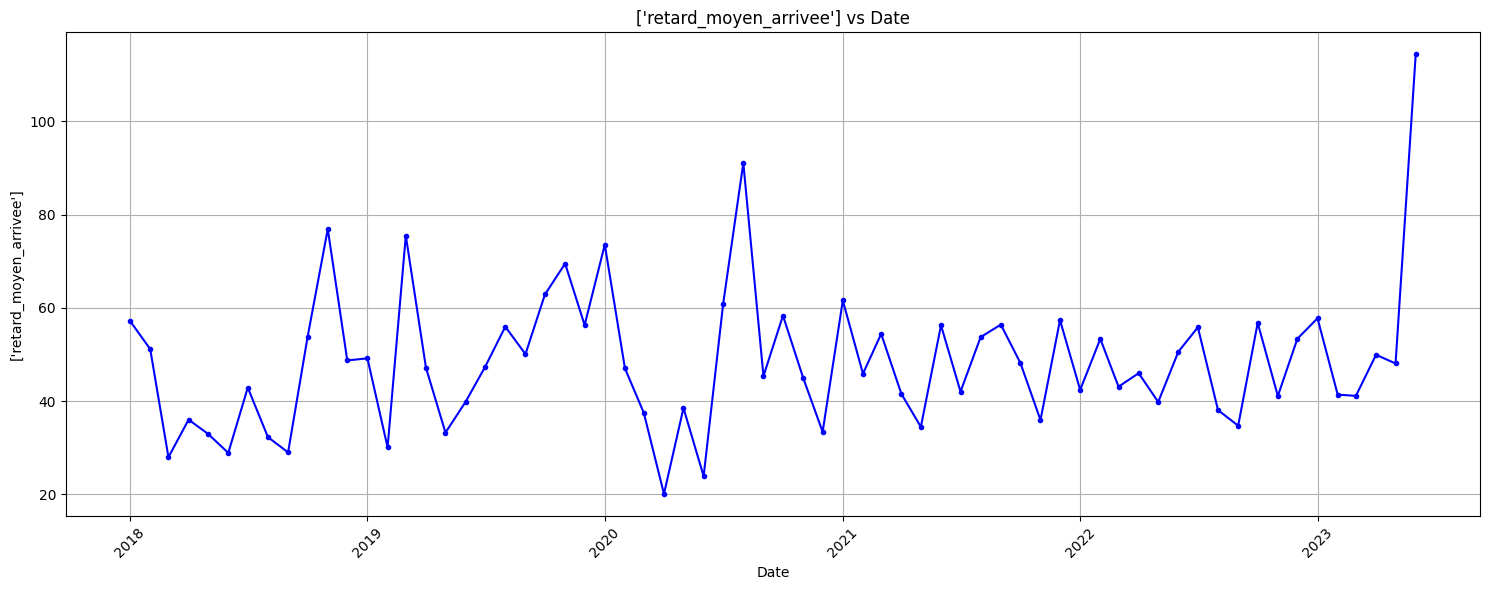

In [52]:
plot_metric_against_data(filtered_data[["date","retard_moyen_arrivee"]])

**Observations :**

By looking at the evolution of the delay across time, we can say with conviction that there is no saisonality for specific itineraries. The possible patters are not obvious at all, so we can already supose it will be very hard to predict the `retard_moyen_arrive` only using this history of this metric, we need for sure to use to other informations we have. Maybe if we compute the average of delay per month we could find some seasonability.


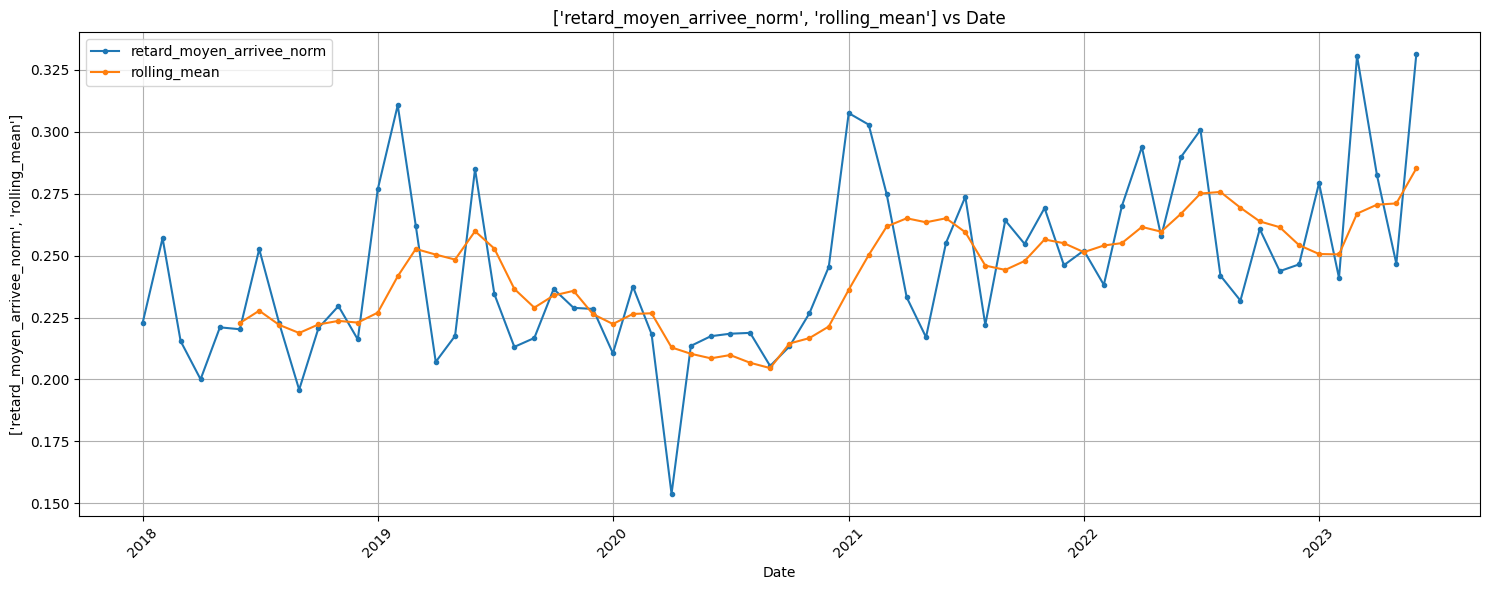

In [60]:
avg_per_month = data.groupby("date").mean(numeric_only=True).reset_index()
avg_per_month["retard_moyen_arrivee_norm"] = avg_per_month["retard_moyen_arrivee"] / avg_per_month["duree_moyenne"]
avg_per_month["rolling_mean"] = avg_per_month["retard_moyen_arrivee_norm"].rolling(window=6).mean()
plot_metric_against_data(avg_per_month[["date","retard_moyen_arrivee_norm","rolling_mean"]])

**Observations :**

No obvious saisonality, we can see the drop point from covid period, and a very smooth incresing trend from covid period until today, but not obvious at all. In order to take into account the covid period, we could add a dummy variable. Maybe it could be interesting to add also dummy variables for christmas and summer, but there is no clear visible relation between these periods and the plot.

## 4. 

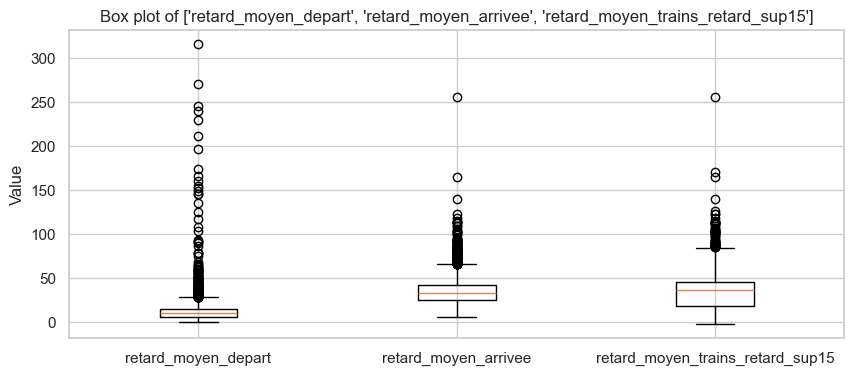

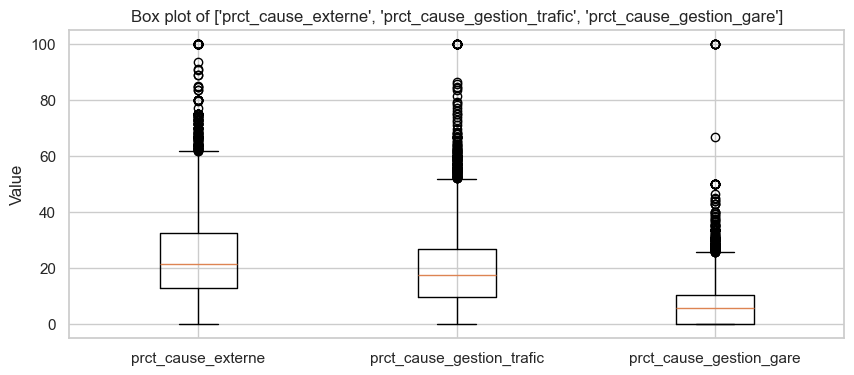

In [24]:
set_of_dims_box_plot = [
    ['retard_moyen_depart','retard_moyen_arrivee','retard_moyen_trains_retard_sup15'],
    ['prct_cause_externe', 'prct_cause_gestion_trafic', 'prct_cause_gestion_gare']
]
for dimensions in set_of_dims_box_plot:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.boxplot(data[dimensions])
    ax.set_title(f'Box plot of {dimensions}')
    ax.set_xticklabels(dimensions)
    ax.set_ylabel('Value')
    plt.show()

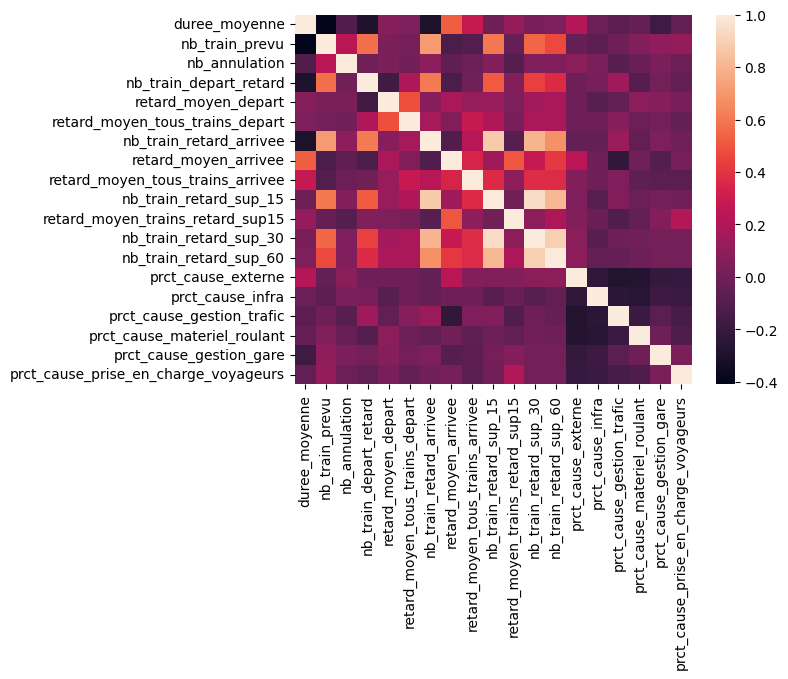

In [75]:
def sliding_window(elements, window_size):
    matrix = []
    if len(elements) <= window_size:
       return elements
    for i in range(len(elements)- window_size + 1):
        matrix+=[elements[i:i+window_size]]
    
    return matrix

,gare_depart,gare_arrivee,date
0,BORDEAUX ST JEAN,PARIS VAUGIRARD,12
1,BORDEAUX ST JEAN,TOURCOING,64
2,MADRID,MARSEILLE ST CHARLES,45
3,MARSEILLE ST CHARLES,MADRID,45
4,MARSEILLE ST CHARLES,TOURCOING,65
5,NANTES,PARIS VAUGIRARD,12
6,PARIS LYON,ZURICH,65
7,PARIS VAUGIRARD,BORDEAUX ST JEAN,12
8,PARIS VAUGIRARD,NANTES,12
9,PARIS VAUGIRARD,RENNES,12


In [82]:
# Erase the trips with less than 66 trips


In [83]:
data_tgv.sort_values(by=['date'], inplace=True)
list_df = []
sw = 18
features_targetted = ['duree_moyenne','retard_moyen_arrivee','retard_moyen_tous_trains_arrivee','nb_train_retard_sup_15','retard_moyen_trains_retard_sup15','nb_train_retard_sup_30','nb_train_retard_sup_60']
for val,group in data_tgv.groupby(["gare_depart","gare_arrivee"]):
    concat_df_list = []
    for dimension in features_targetted:
        concat_df_list += [pd.DataFrame(
            sliding_window(group[dimension].tolist(),sw),
            columns=["M"+str(i)+"_"+dimension for i in range(-sw+1,0,1)] + ["M_"+dimension]
        )]
    df_for_group = pd.concat(concat_df_list, axis=1)
    df_for_group["date"]=group["date"].values[sw-1:]
    df_for_group["gare_depart"]=val[0]
    df_for_group["gare_arrivee"]=val[1]
    list_df+=[df_for_group.copy()]

df = pd.concat(list_df,ignore_index=True)


In [84]:
pd.options.display.max_columns = None
df.head()

,M-17_duree_moyenne,M-16_duree_moyenne,M-15_duree_moyenne,M-14_duree_moyenne,M-13_duree_moyenne,M-12_duree_moyenne,M-11_duree_moyenne,M-10_duree_moyenne,M-9_duree_moyenne,M-8_duree_moyenne,M-7_duree_moyenne,M-6_duree_moyenne,M-5_duree_moyenne,M-4_duree_moyenne,M-3_duree_moyenne,M-2_duree_moyenne,M-1_duree_moyenne,M_duree_moyenne,M-17_retard_moyen_arrivee,M-16_retard_moyen_arrivee,M-15_retard_moyen_arrivee,M-14_retard_moyen_arrivee,M-13_retard_moyen_arrivee,M-12_retard_moyen_arrivee,M-11_retard_moyen_arrivee,M-10_retard_moyen_arrivee,M-9_retard_moyen_arrivee,M-8_retard_moyen_arrivee,M-7_retard_moyen_arrivee,M-6_retard_moyen_arrivee,M-5_retard_moyen_arrivee,M-4_retard_moyen_arrivee,M-3_retard_moyen_arrivee,M-2_retard_moyen_arrivee,M-1_retard_moyen_arrivee,M_retard_moyen_arrivee,M-17_retard_moyen_tous_trains_arrivee,M-16_retard_moyen_tous_trains_arrivee,M-15_retard_moyen_tous_trains_arrivee,M-14_retard_moyen_tous_trains_arrivee,M-13_retard_moyen_tous_trains_arrivee,M-12_retard_moyen_tous_trains_arrivee,M-11_retard_moyen_tous_trains_arrivee,M-10_retard_moyen_tous_trains_arrivee,M-9_retard_moyen_tous_trains_arrivee,M-8_retard_moyen_tous_trains_arrivee,M-7_retard_moyen_tous_trains_arrivee,M-6_retard_moyen_tous_trains_arrivee,M-5_retard_moyen_tous_trains_arrivee,M-4_retard_moyen_tous_trains_arrivee,M-3_retard_moyen_tous_trains_arrivee,M-2_retard_moyen_tous_trains_arrivee,M-1_retard_moyen_tous_trains_arrivee,M_retard_moyen_tous_trains_arrivee,M-17_nb_train_retard_sup_15,M-16_nb_train_retard_sup_15,M-15_nb_train_retard_sup_15,M-14_nb_train_retard_sup_15,M-13_nb_train_retard_sup_15,M-12_nb_train_retard_sup_15,M-11_nb_train_retard_sup_15,M-10_nb_train_retard_sup_15,M-9_nb_train_retard_sup_15,M-8_nb_train_retard_sup_15,M-7_nb_train_retard_sup_15,M-6_nb_train_retard_sup_15,M-5_nb_train_retard_sup_15,M-4_nb_train_retard_sup_15,M-3_nb_train_retard_sup_15,M-2_nb_train_retard_sup_15,M-1_nb_train_retard_sup_15,M_nb_train_retard_sup_15,M-17_retard_moyen_trains_retard_sup15,M-16_retard_moyen_trains_retard_sup15,M-15_retard_moyen_trains_retard_sup15,M-14_retard_moyen_trains_retard_sup15,M-13_retard_moyen_trains_retard_sup15,M-12_retard_moyen_trains_retard_sup15,M-11_retard_moyen_trains_retard_sup15,M-10_retard_moyen_trains_retard_sup15,M-9_retard_moyen_trains_retard_sup15,M-8_retard_moyen_trains_retard_sup15,M-7_retard_moyen_trains_retard_sup15,M-6_retard_moyen_trains_retard_sup15,M-5_retard_moyen_trains_retard_sup15,M-4_retard_moyen_trains_retard_sup15,M-3_retard_moyen_trains_retard_sup15,M-2_retard_moyen_trains_retard_sup15,M-1_retard_moyen_trains_retard_sup15,M_retard_moyen_trains_retard_sup15,M-17_nb_train_retard_sup_30,M-16_nb_train_retard_sup_30,M-15_nb_train_retard_sup_30,M-14_nb_train_retard_sup_30,M-13_nb_train_retard_sup_30,M-12_nb_train_retard_sup_30,M-11_nb_train_retard_sup_30,M-10_nb_train_retard_sup_30,M-9_nb_train_retard_sup_30,M-8_nb_train_retard_sup_30,M-7_nb_train_retard_sup_30,M-6_nb_train_retard_sup_30,M-5_nb_train_retard_sup_30,M-4_nb_train_retard_sup_30,M-3_nb_train_retard_sup_30,M-2_nb_train_retard_sup_30,M-1_nb_train_retard_sup_30,M_nb_train_retard_sup_30,M-17_nb_train_retard_sup_60,M-16_nb_train_retard_sup_60,M-15_nb_train_retard_sup_60,M-14_nb_train_retard_sup_60,M-13_nb_train_retard_sup_60,M-12_nb_train_retard_sup_60,M-11_nb_train_retard_sup_60,M-10_nb_train_retard_sup_60,M-9_nb_train_retard_sup_60,M-8_nb_train_retard_sup_60,M-7_nb_train_retard_sup_60,M-6_nb_train_retard_sup_60,M-5_nb_train_retard_sup_60,M-4_nb_train_retard_sup_60,M-3_nb_train_retard_sup_60,M-2_nb_train_retard_sup_60,M-1_nb_train_retard_sup_60,M_nb_train_retard_sup_60,date,gare_depart,gare_arrivee
0,188,188,188,188,188,188,184,183,183,183,183,187,188,188,188,184,184,185,35.974324,33.835833,32.435897,38.792949,37.066667,30.006085,42.269478,47.460993,48.483333,52.854422,51.348718,40.270202,43.842105,77.325758,37.393678,44.050000,62.802604,48.923423,4.417206,5.652809,4.288187,3.735675,5.488238,5.881300,12.009282,7.609087,4.696134,8.559782,6.937639,4.517277,

In [85]:
df["date"] = pd.to_datetime(df["date"])
train_df = df[df["date"]< "2023-01-01"].copy()
test_df = df[df["date"]>= "2023-01-01"].copy()
print("Taille du dataset d'entrainement",len(train_df))
print("Taille du dataset de test",len(test_df))

Taille du dataset d'entrainement 4988
Taille du dataset de test 696


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    ('regression', LinearRegression())  # Step 2: Apply Linear Regression
])

X_train = train_df.drop(["date","gare_depart","gare_arrivee","M_retard_moyen_arrivee"],axis=1)
y_train = train_df["M_retard_moyen_arrivee"]

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [87]:
visualization_df = df[(df["gare_depart"]=="AIX EN PROVENCE TGV")*(df["gare_arrivee"]=="PARIS LYON")].copy()

In [88]:
predicted_values = pipeline.predict(visualization_df.drop(["date","gare_depart","gare_arrivee","M_retard_moyen_arrivee"],axis=1))


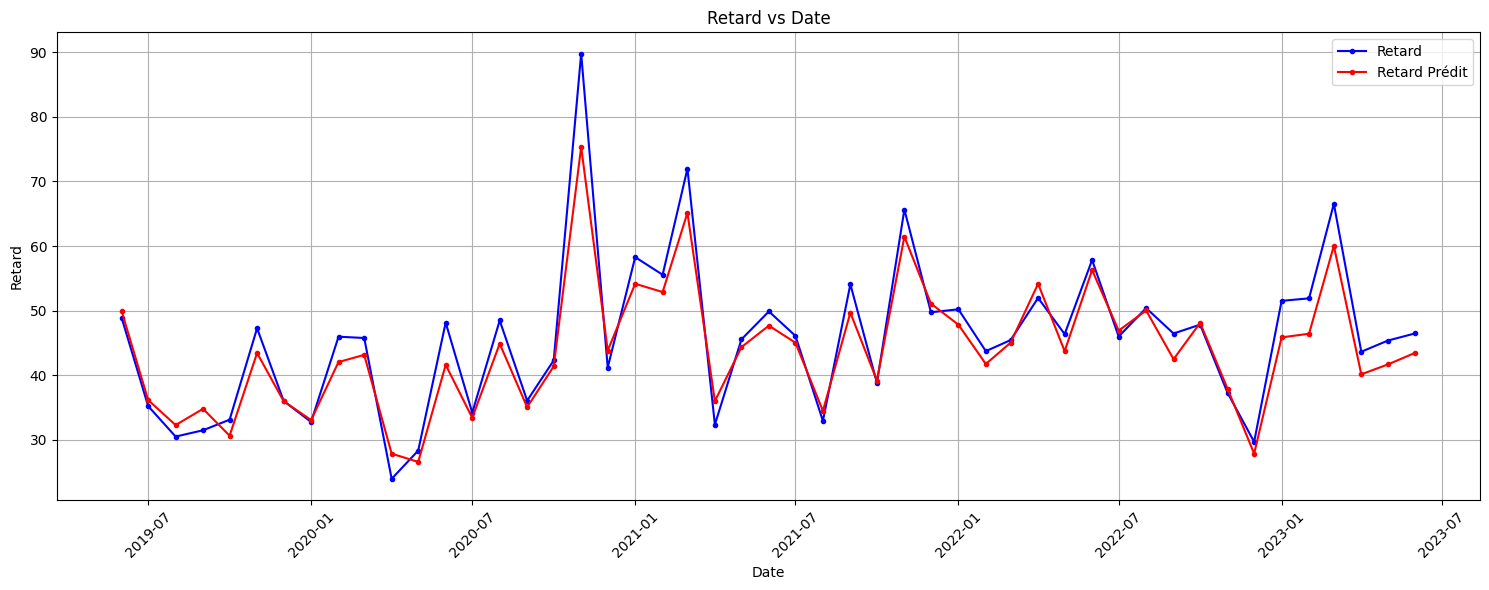

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(visualization_df['date'], visualization_df["M_retard_moyen_arrivee"], marker='.', color='b', linestyle='-', label='Retard')
plt.plot(visualization_df['date'], predicted_values, marker='.', color='r', linestyle='-', label='Retard Prédit')
plt.title('Retard vs Date')
plt.xlabel('Date')
plt.ylabel('Retard')
plt.legend()  # Show legend to distinguish between 'retard' and 'retard_predit'
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

,M-6_duree_moyenne,M-5_duree_moyenne,M-4_duree_moyenne,M-3_duree_moyenne,M-2_duree_moyenne,M-1_duree_moyenne,M_duree_moyenne,M-6_retard_moyen_arrivee,M-5_retard_moyen_arrivee,M-4_retard_moyen_arrivee,M-3_retard_moyen_arrivee,M-2_retard_moyen_arrivee,M-1_retard_moyen_arrivee,M_retard_moyen_arrivee,M-6_retard_moyen_tous_trains_arrivee,M-5_retard_moyen_tous_trains_arrivee,M-4_retard_moyen_tous_trains_arrivee,M-3_retard_moyen_tous_trains_arrivee,M-2_retard_moyen_tous_trains_arrivee,M-1_retard_moyen_tous_trains_arrivee,M_retard_moyen_tous_trains_arrivee,M-6_nb_train_retard_sup_15,M-5_nb_train_retard_sup_15,M-4_nb_train_retard_sup_15,M-3_nb_train_retard_sup_15,M-2_nb_train_retard_sup_15,M-1_nb_train_retard_sup_15,M_nb_train_retard_sup_15,M-6_retard_moyen_trains_retard_sup15,M-5_retard_moyen_trains_retard_sup15,M-4_retard_moyen_trains_retard_sup15,M-3_retard_moyen_trains_retard_sup15,M-2_retard_moyen_trains_retard_sup15,M-1_retard_moyen_trains_retard_sup15,M_retard_moyen_trains_retard_sup15,M-6_nb_train_retard_sup_30,M-5_nb_train_retard_sup_30,M-4_nb_train_retard_sup_30,M-3_nb_train_retard_sup_30,M-2_nb_train_retard_sup_30,M-1_nb_train_retard_sup_30,M_nb_train_retard_sup_30,M-6_nb_train_retard_sup_60,M-5_nb_train_retard_sup_60,M-4_nb_train_retard_sup_60,M-3_nb_train_retard_sup_60,M-2_nb_train_retard_sup_60,M-1_nb_train_retard_sup_60,M_nb_train_retard_sup_60,date,gare_depart,gare_arrivee


In [27]:
features = []
for dimension in features_targetted:
    features += ["M"+str(i)+"_"+dimension for i in range(-sw+1,0,1)] + ["M_"+dimension]
features.remove("M_retard_moyen_arrivee")

In [40]:
train_df = train_df[np.logical_not(train_df[features]==0)]

,M-6_duree_moyenne,M-5_duree_moyenne,M-4_duree_moyenne,M-3_duree_moyenne,M-2_duree_moyenne,M-1_duree_moyenne,M_duree_moyenne,M-6_retard_moyen_arrivee,M-5_retard_moyen_arrivee,M-4_retard_moyen_arrivee,M-3_retard_moyen_arrivee,M-2_retard_moyen_arrivee,M-1_retard_moyen_arrivee,M_retard_moyen_arrivee,M-6_retard_moyen_tous_trains_arrivee,M-5_retard_moyen_tous_trains_arrivee,M-4_retard_moyen_tous_trains_arrivee,M-3_retard_moyen_tous_trains_arrivee,M-2_retard_moyen_tous_trains_arrivee,M-1_retard_moyen_tous_trains_arrivee,M_retard_moyen_tous_trains_arrivee,M-6_nb_train_retard_sup_15,M-5_nb_train_retard_sup_15,M-4_nb_train_retard_sup_15,M-3_nb_train_retard_sup_15,M-2_nb_train_retard_sup_15,M-1_nb_train_retard_sup_15,M_nb_train_retard_sup_15,M-6_retard_moyen_trains_retard_sup15,M-5_retard_moyen_trains_retard_sup15,M-4_retard_moyen_trains_retard_sup15,M-3_retard_moyen_trains_retard_sup15,M-2_retard_moyen_trains_retard_sup15,M-1_retard_moyen_trains_retard_sup15,M_retard_moyen_trains_retard_sup15,M-6_nb_train_retard_sup_30,M-5_nb_train_retard_sup_30,M-4_nb_train_retard_sup_30,M-3_nb_train_retard_sup_30,M-2_nb_train_retard_sup_30,M-1_nb_train_retard_sup_30,M_nb_train_retard_sup_30,M-6_nb_train_retard_sup_60,M-5_nb_train_retard_sup_60,M-4_nb_train_retard_sup_60,M-3_nb_train_retard_sup_60,M-2_nb_train_retard_sup_60,M-1_nb_train_retard_sup_60,M_nb_train_retard_sup_60,date,gare_depart,gare_arrivee


In [41]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_df[features], train_df["M_retard_moyen_arrivee"])

ValueError: Found array with 0 sample(s) (shape=(0, 48)) while a minimum of 1 is required by LinearRegression.

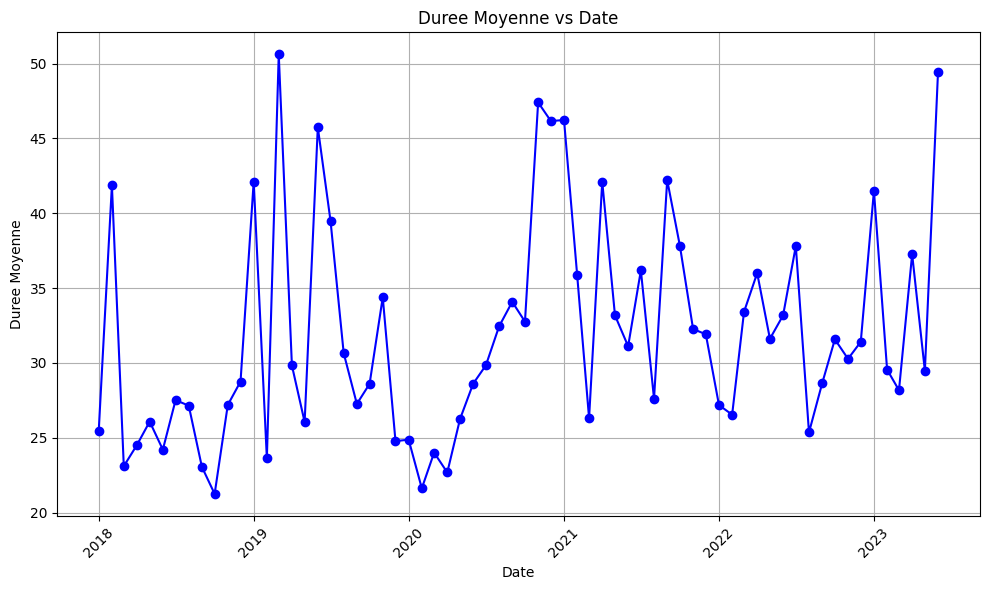

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'date' and 'duree_moyenne' columns
# For example:
# df = pd.DataFrame({'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
#                    'duree_moyenne': [5, 7, 3]})

# Convert 'date' column to datetime if it's not already in datetime format
paris_bordeaux_df['date'] = pd.to_datetime(paris_bordeaux_df['date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(paris_bordeaux_df['date'], paris_bordeaux_df['retard_moyen_arrivee'], marker='o', color='b', linestyle='-')
plt.title('Duree Moyenne vs Date')
plt.xlabel('Date')
plt.ylabel('Duree Moyenne')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [29]:
useful_dimensions = ['date','retard_moyen_arrivee']

In [30]:
df = paris_bordeaux_df[useful_dimensions].copy()

In [31]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

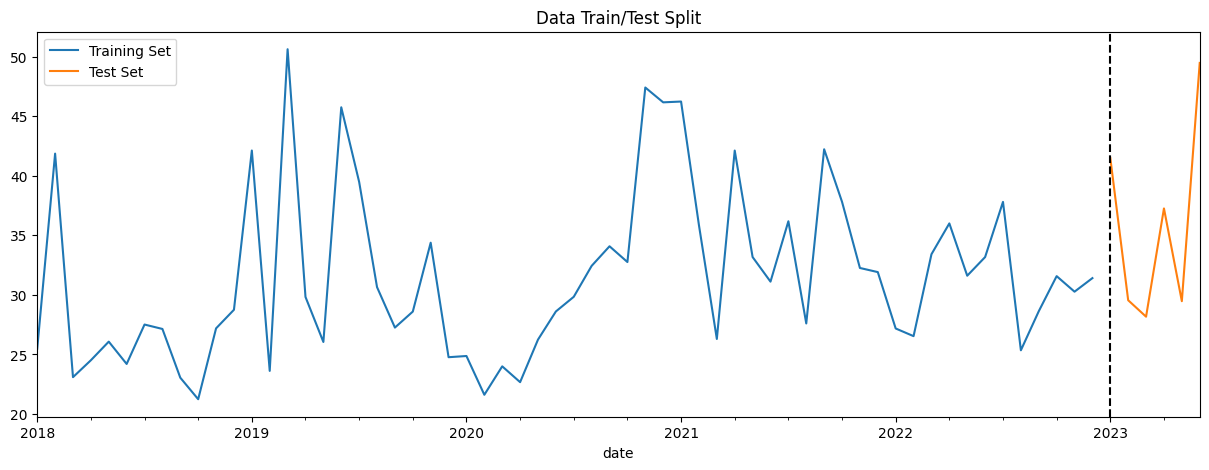

In [32]:
train = df.loc[df.index < '01-01-2023']
test = df.loc[df.index >= '01-01-2023']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [16]:
data_sw["date"]=df.index[4:]

In [17]:
data_sw.head()

,D-4,D-3,D-2,D-1,D,date
0,25.479114,41.854352,23.095833,24.514620,26.076364,2018-05-01
1,41.854352,23.095833,24.514620,26.076364,24.203111,2018-06-01
2,23.095833,24.514620,26.076364,24.203111,27.511538,2018-07-01
3,24.514620,26.076364,24.203111,27.511538,27.141129,2018-08-01
4,26.076364,24.203111,27.511538,27.141129,23.050962,2018-09-01


In [18]:
train_df = data_sw[data_sw["date"]< "2023-01-01"].copy()
test_df = data_sw[data_sw["date"]>= "2023-01-01"].copy()

In [19]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_df[["D-4","D-3","D-2","D-1"]], train_df["D"])




LinearRegression()

In [20]:

lr_y_test_pred = lr_model.predict(test_df[["D-4","D-3","D-2","D-1"]])
lr_y_train_pred = lr_model.predict(train_df[["D-4","D-3","D-2","D-1"]])

df_to_plot = pd.DataFrame({"date":data_sw["date"].tolist(),"retard":data_sw["D"].tolist(),"retard_predit":lr_y_train_pred.tolist()+lr_y_test_pred.tolist()})


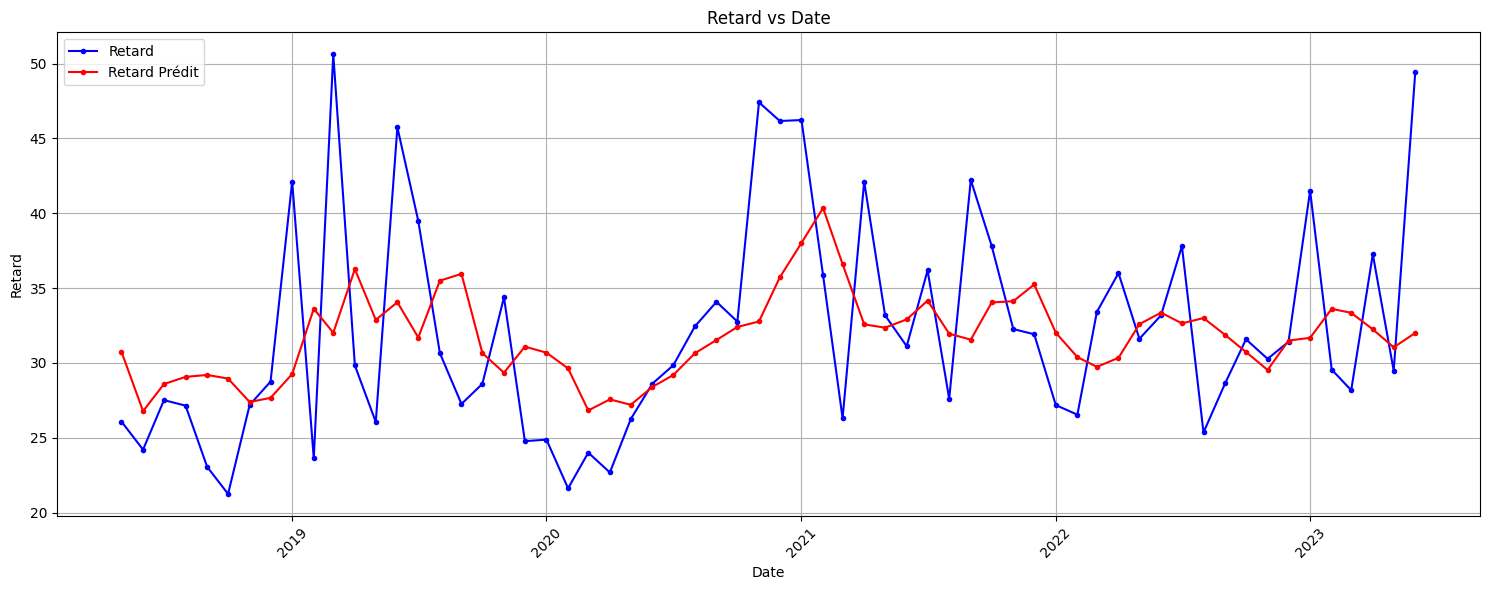

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(df_to_plot['date'], df_to_plot['retard'], marker='.', color='b', linestyle='-', label='Retard')
plt.plot(df_to_plot['date'], df_to_plot['retard_predit'], marker='.', color='r', linestyle='-', label='Retard Prédit')
plt.title('Retard vs Date')
plt.xlabel('Date')
plt.ylabel('Retard')
plt.legend()  # Show legend to distinguish between 'retard' and 'retard_predit'
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### Approches possibles
- Sliding window avec normalisation ou non de la data et faire des regressions
- Clustering des comportements de chaque trajet pour essayer de comprendre des patterns commun au sein de certains trajets. 